# Choosing a Schema Verifier Model

Models Tested:
  - Linear Regression
  - KNN
    - No Scaling
    - Standard Scaling
    - Robust Scaling
    - MinMaxScaling
    - GridSearchCV

Model Chosen: KNN with MinMaxScaling

In [611]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [612]:
schemas_path = "../data/schemas.txt"
# Create the dataframe
df = pd.read_csv(schemas_path, sep=";")
df.head()

,Type,Modulus,Size,Skip Values,Skip Type,Result
0,Circles,20,22,3,original,1
1,Circles,15,33,"2,4,6,8,10,12",original,1
2,Circles,20,23,"1,2,3,4,5",original,1
3,Circles,25,11,"5,10",original,1
4,Circles,10,9,1,original,1


In [613]:
df.shape

(984, 6)

In [614]:
# Check the amount of Results are 0, 1, and 2
df.Result.value_counts()

0    526
1    442
2     16
Name: Result, dtype: int64

In [615]:
# Get the types where the Results are 0, 1, and 2
empties = df.where(df.Result == 1).Type.value_counts()
fulls = df.where(df.Result == 2).Type.value_counts()
oks = df.where(df.Result == 0).Type.value_counts()

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

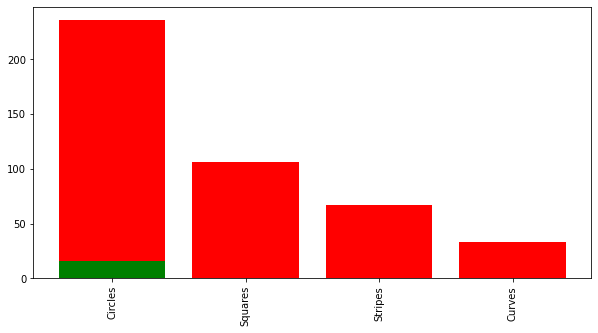

In [616]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(empties.index, empties.values, color="red")
plt.bar(fulls.index, fulls.values, color="green")
# plt.bar(oks.index, oks.values, color="blue")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'OK schemas')

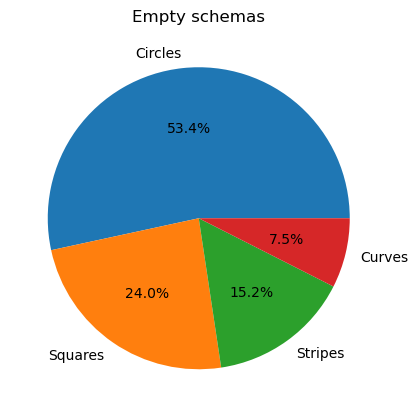

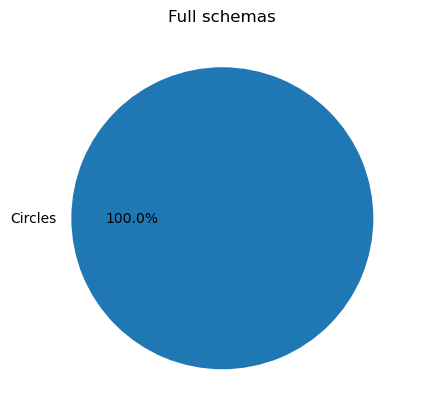

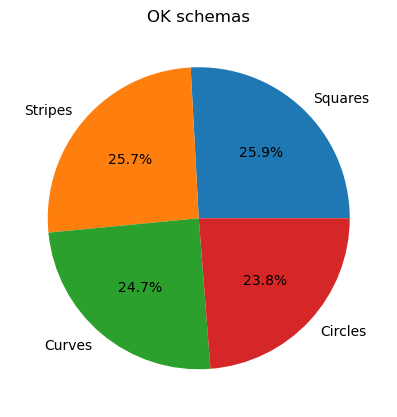

In [617]:
# Plot the results as a pie chart
# Make the text color white
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.pie(empties.values, labels=empties.index, autopct="%1.1f%%")
plt.title("Empty schemas")
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.pie(fulls.values, labels=fulls.index, autopct="%1.1f%%")
plt.title("Full schemas")
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.pie(oks.values, labels=oks.index, autopct="%1.1f%%")
plt.title("OK schemas")

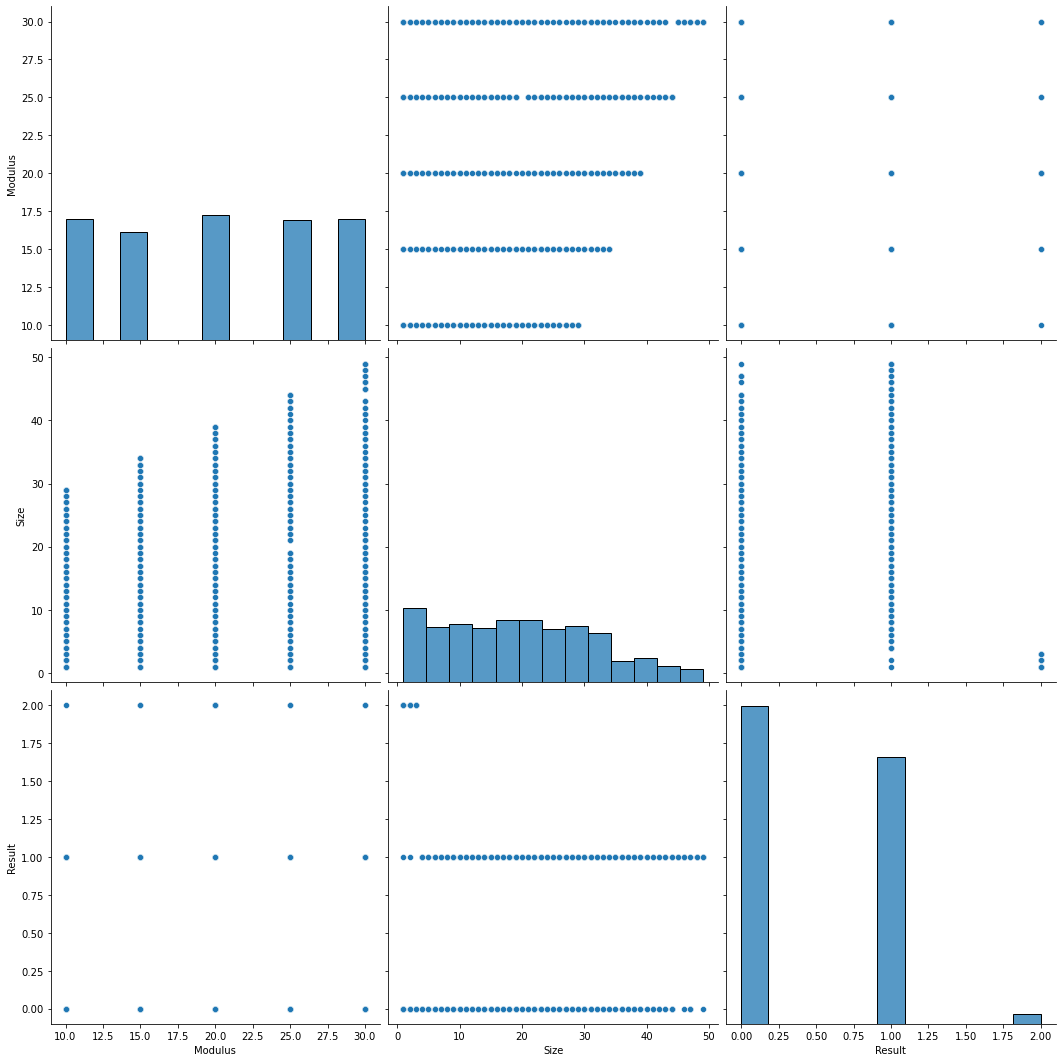

In [618]:
sns.pairplot(df, height=5)

In [619]:
# Convert the Type column to a dummy variable
df = pd.get_dummies(df, columns=["Type"])
df.head()

,Modulus,Size,Skip Values,Skip Type,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,20,22,3,original,1,1,0,0,0
1,15,33,"2,4,6,8,10,12",original,1,1,0,0,0
2,20,23,"1,2,3,4,5",original,1,1,0,0,0
3,25,11,"5,10",original,1,1,0,0,0
4,10,9,1,original,1,1,0,0,0


In [620]:
# Convert the Result column to a 1 or a 0
df.Result = df.Result.map({0: 1, 1: 0, 2: 0})

In [621]:
# sns.pairplot(df, height=2.5)

# Model

In [622]:
# Drop unnecessary columns
df = df.drop(columns=["Skip Type"], axis=1)
df.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,20,22,3,0,1,0,0,0
1,15,33,"2,4,6,8,10,12",0,1,0,0,0
2,20,23,"1,2,3,4,5",0,1,0,0,0
3,25,11,"5,10",0,1,0,0,0
4,10,9,1,0,1,0,0,0


In [623]:
# Find the starting number of the Skip Values
df["Skip Values"] = df["Skip Values"].map(lambda x: int(x.split(",")[0]))

In [624]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [625]:
model = LinearRegression()

In [626]:
# Split the data frame into training and test sets
linear_df = df.copy()
X_train, X_test, y_train, y_test = train_test_split(linear_df.drop("Result", axis=1), linear_df.Result, test_size=0.2)

In [627]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(787, 7)
(197, 7)
(787,)
(197,)


In [628]:
model.fit(X_train, y_train)

LinearRegression()

In [629]:
print(model.coef_)
print(model.intercept_)

[-2.00684672e-04 -1.20139501e-02  5.80824137e-02 -2.66075222e-01
  1.92478148e-01 -8.50025223e-03  8.20973265e-02]
0.6234133459051983


Text(0, 0.5, 'Result')

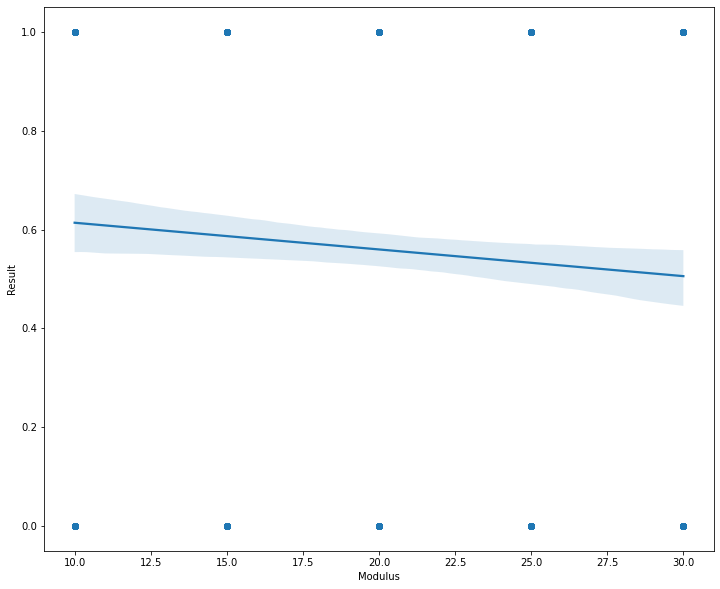

In [630]:
plt.figure(figsize=(12, 10))
sns.regplot(x=X_train.Modulus, y=y_train, data=df)
plt.xlabel("Modulus")
plt.ylabel("Result")

In [631]:
y_pred = model.predict(X_test)

In [632]:
# Score the model
print(model.score(X_test, y_test))

0.31522034340795935


# KNeighborsClassifier

In [633]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [634]:
df_no_scaling = df.copy()
df_standard_scaling = df.copy()
df_minmax_scaling = df.copy()
df_robust_scaling = df.copy()

In [635]:
# Split the data frame into training and test sets
X_train_no_scaling, X_test_no_scaling, y_train_no_scaling, y_test_no_scaling = train_test_split(df_no_scaling.drop("Result", axis=1), df_no_scaling.Result, test_size=0.2)

# No scaling

In [636]:
knn = KNeighborsClassifier(n_neighbors=3)

In [637]:
knn.fit(X_train_no_scaling, y_train_no_scaling)

KNeighborsClassifier(n_neighbors=3)

In [638]:
X_test_no_scaling.head()

,Modulus,Size,Skip Values,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
112,15,33,2,1,0,0,0
810,15,27,1,1,0,0,0
599,20,25,10,1,0,0,0
905,15,23,3,0,0,1,0
43,10,4,2,1,0,0,0


In [639]:
# Predict the test set
y_pred_no_scaling = knn.predict(X_test_no_scaling)
print(y_pred_no_scaling)

[0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 0]


In [640]:
# Score the model
knn.score(X_test_no_scaling, y_test_no_scaling)

0.700507614213198

# Standard Scaling

In [641]:
scaler = StandardScaler()

In [642]:
features = [["Modulus", "Size", "Skip Values"]]
for feature in features:
    df_standard_scaling[feature] = scaler.fit_transform(df_standard_scaling[feature])
df_standard_scaling.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,-0.014337,0.177420,-0.301487,0,1,0,0,0
1,-0.719727,1.085410,-0.626419,0,1,0,0,0
2,-0.014337,0.259965,-0.951351,0,1,0,0,0
3,0.691052,-0.730569,0.348377,0,1,0,0,0
4,-1.425116,-0.895659,-0.951351,0,1,0,0,0


In [643]:
# Create the training and test sets
X_train_standard_scaling, X_test_standard_scaling, y_train_standard_scaling, y_test_standard_scaling = train_test_split(df_standard_scaling.drop("Result", axis=1), df_standard_scaling.Result, test_size=0.2, random_state=4)

In [644]:
X_train_standard_scaling.head()

,Modulus,Size,Skip Values,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
228,-0.014337,1.167955,-0.951351,1,0,0,0
596,0.691052,1.415588,-0.301487,0,0,1,0
330,-0.719727,0.837777,-0.626419,0,0,0,1
942,-0.719727,-1.225837,-0.951351,0,1,0,0
36,-0.719727,-0.813114,-0.626419,1,0,0,0


In [645]:
X_test_standard_scaling.head()

,Modulus,Size,Skip Values,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
646,-0.014337,-1.308381,-0.626419,0,0,0,1
846,-1.425116,-0.235302,-0.626419,0,0,1,0
595,-0.719727,1.002866,1.973037,1,0,0,0
747,0.691052,-0.400391,0.348377,0,0,1,0
260,1.396442,-1.308381,-0.626419,0,0,0,1


In [646]:
knn = KNeighborsClassifier()

In [647]:
# Train
knn.fit(X_train_standard_scaling, y_train_standard_scaling)

KNeighborsClassifier()

In [648]:
# Predict
y_pred_standard_scaling = knn.predict(X_test_standard_scaling)
y_pred_standard_scaling

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [649]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test_standard_scaling, y_pred_standard_scaling))
print(knn.score(X_test_standard_scaling, y_test_standard_scaling))
print(roc_auc_score(y_test_standard_scaling, y_pred_standard_scaling))

0.7461928934010152
0.7461928934010152
0.7447981689554724


# Robust Scaling

In [650]:
scaler = RobustScaler()
knn = KNeighborsClassifier()

In [651]:
for feature in features:
    df_robust_scaling[feature] = scaler.fit_transform(df_robust_scaling[feature])
df_robust_scaling.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,0.0,0.157895,0.000000,0,1,0,0,0
1,-0.5,0.736842,-0.333333,0,1,0,0,0
2,0.0,0.210526,-0.666667,0,1,0,0,0
3,0.5,-0.421053,0.666667,0,1,0,0,0
4,-1.0,-0.526316,-0.666667,0,1,0,0,0


In [652]:
# Create the training and test sets
X_train_robust_scaling, X_test_robust_scaling, y_train_robust_scaling, y_test_robust_scaling = train_test_split(df_robust_scaling.drop("Result", axis=1), df_robust_scaling.Result, test_size=0.2, random_state=4)

In [653]:
# Train
knn.fit(X_train_robust_scaling, y_train_robust_scaling)

KNeighborsClassifier()

In [654]:
y_pred_robust_scaling = knn.predict(X_test_robust_scaling)
print(y_pred_robust_scaling)

[1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0
 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 1 1 0]


In [655]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test_robust_scaling, y_pred_robust_scaling))
print(knn.score(X_test_robust_scaling, y_test_robust_scaling))
print(roc_auc_score(y_test_robust_scaling, y_pred_robust_scaling))

0.7411167512690355
0.7411167512690355
0.7362151477320018


# MinMaxScaling

In [656]:
scaler = MinMaxScaler()
knn = KNeighborsClassifier()

In [657]:
for feature in features:
    df_minmax_scaling[feature] = scaler.fit_transform(df_minmax_scaling[feature])
df_minmax_scaling.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,0.50,0.437500,0.222222,0,1,0,0,0
1,0.25,0.666667,0.111111,0,1,0,0,0
2,0.50,0.458333,0.000000,0,1,0,0,0
3,0.75,0.208333,0.444444,0,1,0,0,0
4,0.00,0.166667,0.000000,0,1,0,0,0


In [658]:
# Create the training and test sets
X_train_minmax_scaling, X_test_minmax_scaling, y_train_minmax_scaling, y_test_minmax_scaling = train_test_split(df_minmax_scaling.drop("Result", axis=1), df_minmax_scaling.Result, test_size=0.2, random_state=4)

In [659]:
# Train
knn.fit(X_train_minmax_scaling, y_train_minmax_scaling)

KNeighborsClassifier()

In [660]:
y_pred_minmax_scaling = knn.predict(X_test_minmax_scaling)
print(y_pred_minmax_scaling)

[1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0
 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1
 0 1 1 0 1 1 0 0 1 1 1 0]


In [661]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test_minmax_scaling, y_pred_minmax_scaling))
print(knn.score(X_test_minmax_scaling, y_pred_minmax_scaling))
print(roc_auc_score(y_test_minmax_scaling, y_pred_minmax_scaling))

0.751269035532995
1.0
0.7474511027881815


# GridSearchCV

In [662]:
knn = KNeighborsClassifier()
# List Hyperparameters to tune
leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 30))
p =[1, 2]

In [663]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [664]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Result", axis=1), df.Result, test_size=0.2, random_state=4)

In [ ]:
# Make model
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(X_train, y_train)

In [ ]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 12
Best p: 1
Best n_neighbors: 19


In [ ]:
# Predict test set
y_pred = best_model.predict(X_test)

In [ ]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test, y_pred))
print(best_model.score(X_test, y_test))
print(roc_auc_score(y_test, y_pred))

0.6802030456852792
0.6802030456852792
0.6945892410341952
